# 教學目標:
    了解 Padding 的作法
    
    了解 Pooling 的作法

# 範例說明:
    (1)zero_pad - feature map 跟原圖的比對
    
    (2)pool_forward - 前行網路的 pooling layer

# 作業:
    (1) 調整Padding 的設定, 看 Pad 後的結果
    
    (2) 調整Pooling 的設定, 看 Pooling 後的結果

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

# 繪圖結果直接顯示在Jupyter cell 之內
%matplotlib inline  
plt.rcParams['figure.figsize'] = (5.0, 4.0) #  設定繪圖板的大小
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# autoreload。可以讓我們不退出IPython就動態修改代碼，在執行代碼前IPython會幫我們自動重載改動的模塊
%load_ext autoreload
%autoreload 2
np.random.seed(1)

In [2]:
# GRADED FUNCTION: zero_pad
def zero_pad(X, pad):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (m, n_H, n_W, n_C), 代表一批 m 個圖像
         n_H: 圖高, n_W: 圖寬, n_C: color channels 數
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
  
    return X_pad

In [3]:
import numpy

change_array = numpy.array([1,2,3,4,5,6])
change_array.shape = (3, 2)
print(change_array) 
print(change_array.shape)

[[1 2]
 [3 4]
 [5 6]]
(3, 2)


(1, 3, 3, 1)
x.shape = (1, 3, 3, 1)
x_pad.shape = (1, 7, 7, 1)
x[0,1,1,0] = 0.8654076293246785
x_pad[0,1,1,0] = 0.0


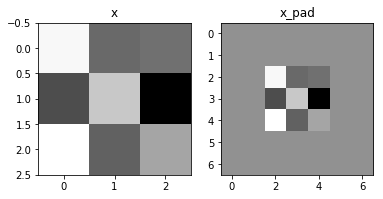

In [4]:
'''
seed( ) 用於指定隨機數生成時所用算法開始的整數值，
如果使用相同的seed( )值，則每次生成的隨即數都相同，
如果不設置這個值，則係統根據時間來自己選擇這個值，
此時每次生成的隨機數因時間差異而不同。
'''
np.random.seed(1)

#x = np.random.randn(4, 3, 3, 2) #產生gray image
x = np.random.randn(1, 3, 3, 1) #產生gray image
print(x.shape)
x_pad = zero_pad(x, 2) # 加兩圈 Pad
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
#print ("x[1,1] =", x[1,1])
#print ("x_pad[1,1] =", x_pad[1,1])
print ("x[0,1,1,0] =", x[0,1,1,0])
print ("x_pad[0,1,1,0] =", x_pad[0,1,1,0])
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

Padding 設定調整

In [5]:
# GRADED FUNCTION: zero_pad
def zero_padding(X, pad, pad_val=0):
    """
    對image X 做 zero-padding. 
    參數定義如下:
    X -- python numpy array, 呈現維度 (n_H, n_W), 
         n_H: 圖高, n_W: 圖寬
    pad -- 整數, 加幾圈的 zero padding.
    Returns:
    X_pad -- image of shape (n_H + 2*pad, n_W + 2*pad) 做完zero-padding 的結果
    """
    
    X_pad = np.pad(X, (pad, pad), 'constant', constant_values=(pad_val, pad_val))
  
    return X_pad

In [6]:
# ref: https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image
# ref: cmap https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html

from sklearn import datasets, metrics

import matplotlib.pyplot as plt
%matplotlib inline

digits = datasets.load_digits()

def plot_pad_numbers(pad_ring=0, pad_val = 0, show_img_cnts = 10):
    n_cols = 5
    n_rows = (max(0, show_img_cnts-1) // n_cols) + 1

    print(f"{'-'*60}") 
    fig, axes = plt.subplots(n_rows, n_cols)
    for (i, ax) in zip(range(show_img_cnts), axes.ravel()):
        img_raw = digits.data.reshape(-1, 8, 8)[i]
        ax.imshow(img_raw, cmap=plt.cm.binary)
        ax.set_aspect('equal')
        ax.autoscale(False)
        ax.set_xticks([])
        ax.set_yticks([])
        fig.tight_layout()
    plt.show()

    print(f"{'-'*60}")    
    plt.gcf().clear()
    fig, axes = plt.subplots(n_rows, n_cols)
    for (i, ax) in zip(range(show_img_cnts), axes.ravel()):
        img_pad = zero_padding(digits.data.reshape(-1, 8, 8)[i], pad_ring, pad_val=pad_val)
        ax.matshow(img_pad, cmap=plt.cm.binary)
        ax.set_aspect('equal')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.autoscale(False)
        fig.tight_layout()
    plt.show()


In [7]:
def plot_pad_image(img_raw, pad_ring=0, pad_val = 0):
    print(f"{'-'*60}")    
    data = img_pad = zero_padding(img_raw, pad_ring, pad_val=pad_val)
    heatmap = plt.pcolor(img_pad, cmap="gray_r")    # reverse: color+'_r'

    for y in range(data.shape[0]):
        for x in range(data.shape[1]):
            plt.text(x + 0.5, y + 0.5, f'{data[y, x]:.0f}',
                     horizontalalignment='center',
                     verticalalignment='center',
                     bbox=dict(facecolor='white', alpha=0.3),
                     )

    plt.xticks([])
    plt.yticks([])
    plt.show()

========================= pad size = 1 =========================
------------------------------------------------------------


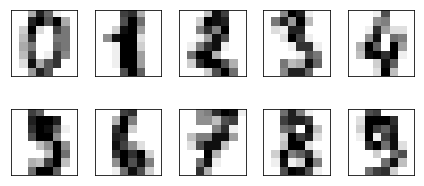

------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

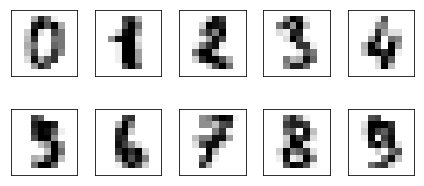

............................................................
------------------------------------------------------------


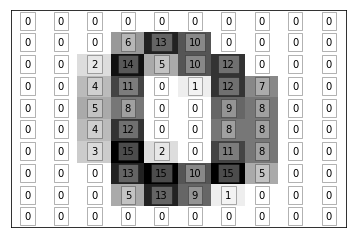


========================= pad size = 2 =========================
------------------------------------------------------------


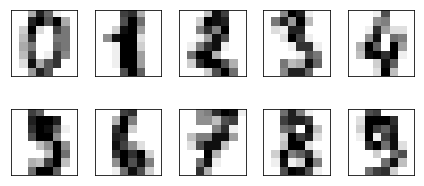

------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

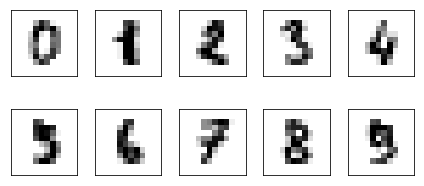

............................................................
------------------------------------------------------------


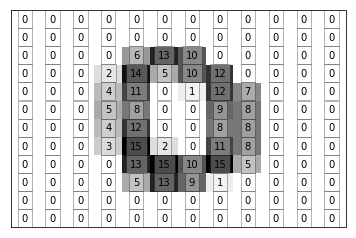


========================= pad size = 3 =========================
------------------------------------------------------------


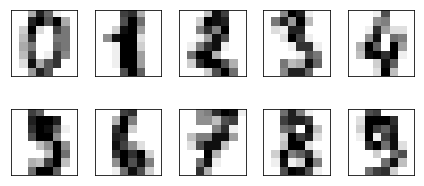

------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

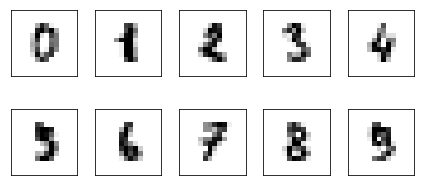

............................................................
------------------------------------------------------------


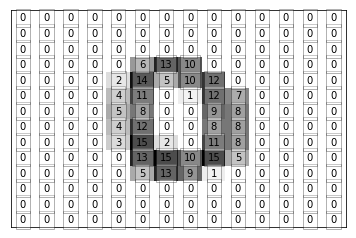

In [8]:
for pad_ring in range(1, 4):
    print(f"{'='*25} pad size = {pad_ring} {'='*25}")
    plot_pad_numbers(pad_ring=pad_ring)
    print('.'*60)
    plot_pad_image(digits.data.reshape(-1, 8, 8)[0], pad_ring=pad_ring)
    print()


Pooling 設定調整

In [9]:
# GRADED FUNCTION: pool_forward
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    設計一個前行網路的池化層
    參數定義如下:
    A_prev -- 輸入的numpy 陣列, 維度 (m, n_H_prev, n_W_prev, n_C_prev)
    hparameter 超參數 --  "f" and "stride" 所形成的python 字典
    mode -- 池化的模式: "max" or "average"
    
    返回:
        A -- 輸出的池化層, 維度為 (m, n_H, n_W, n_C) 的 numpy 陣列
        cache -- 可以應用在 backward pass pooling layer 資料, 包含 input and hparameter
    """

    # 檢索尺寸 from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
 
    # 檢索超參數 from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # 定義輸出的dimensions
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # 初始化輸出的 matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    ### 程式起始位置  ###
    for i in range(m): # 訓練樣本的for 迴圈
        for h in range(n_H): # 輸出樣本的for 迴圈, 針對vertical axis
            for w in range(n_W): #  輸出樣本的for 迴圈, 針對 horizontal axis
                for c in range (n_C): #  輸出樣本的for 迴圈, 針對channels

                     # 找出特徵圖的寬度跟高度四個點
                    vert_start = h * stride
                    vert_end = h * stride+ f
                    horiz_start = w * stride
                    horiz_end = w * stride + f

                    # 定義第i個訓練示例
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end,c]

                    # 計算輸入data 的池化結果. 使用 if statment 去做分類
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)

                        ### 程式結束  ###
    
    # 儲存輸入的特徵圖跟所設定的超參數, 可以用在 pool_backward()
    cache = (A_prev, hparameters)
    
    # 確認輸出的資料維度
    assert(A.shape == (m, n_H, n_W, n_C))
    return A, cache

In [10]:
raw_img = digits.data.reshape(-1, 8, 8)[0]
img = raw_img.reshape(1, 8, 8, 1)

opts_stride = [1, 2, 3]
opts_f      = [2, 3, 4]
for f in opts_f:
    for stride in opts_stride:
        hparameters = {"f": f, "stride" : stride}
        
        print(f"\n\n{'='*60}")
        print()
        print(hparameters)
        print()

        print("raw image")
        print(f"{raw_img}")

        A_prev = img
        pooled_img, cache = pool_forward(A_prev, hparameters)
        print("mode = max")
        w = pooled_img.shape[1]
        h = pooled_img.shape[2]
        print(f"==>\n{pooled_img.reshape(w,h)}")

        print()
        pooled_img, cache = pool_forward(A_prev, hparameters, mode = "average")
        print("mode = average")
        w = pooled_img.shape[1]
        h = pooled_img.shape[2]
        print(f"==>\n{pooled_img.reshape(w,h)}")





{'f': 2, 'stride': 1}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
mode = max
==>
[[ 0. 13. 15. 15. 15. 15.  5.]
 [ 3. 15. 15. 15. 15. 15.  8.]
 [ 4. 15. 15.  2. 11. 11.  8.]
 [ 5. 12. 12.  0.  9.  9.  8.]
 [ 5. 11. 11.  1. 12. 12.  8.]
 [ 4. 14. 14. 10. 12. 12.  7.]
 [ 2. 14. 14. 13. 12. 12.  0.]]

mode = average
==>
[[ 0.    4.5  11.5  11.75  8.75  5.25  1.25]
 [ 0.75  7.75 11.25  6.75  9.    9.75  3.25]
 [ 1.75  8.5   7.25  0.5   4.75  8.75  4.  ]
 [ 2.25  7.25  5.    0.    4.25  8.25  4.  ]
 [ 2.25  7.    4.75  0.25  5.5   9.    3.75]
 [ 1.5   7.75  7.5   4.    8.75  7.75  1.75]
 [ 0.5   5.5   9.5   9.5   8.    3.    0.  ]]



{'f': 2, 'stride': 2}

raw image
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3